### Try to run t-sne with some very close value of perplexity
* Goal: Determine that perp=10.1 and perp=10.2 will give different embedding?
* Try with some different values of perps: 
    - `(10.1, 10.2, 10.5, 10.55)`,
    - `(30.01, 30.02, 30.05, 30.1)`,
    - `(50.000, 50.001, 50.002, 50.003)`

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn import datasets

In [3]:
data = datasets.load_digits()
X = data.data
y = data.target

In [12]:
def run_tsne(perp):
    print('running with perp', perp)
    tsne = TSNE(perplexity=perp, random_state=0)
    X2d = tsne.fit_transform(X)
    loss = tsne.kl_divergence_
    n_iter = tsne.n_iter_
    return X2d, loss, n_iter

In [10]:
perp_test_cases = [
    [10.1, 10.2, 10.5, 10.55],
    [30.01, 30.02, 30.05, 30.1],
    [50.000, 50.001, 50.002, 50.003]
]

In [15]:
results = [ [()] * len(perp_test_cases[0]) for _ in range(len(perp_test_cases)) ]

for i, perp_test_case in enumerate(perp_test_cases):
    for j, perp in enumerate(perp_test_case):
        results[i][j] = run_tsne(perp)

running with perp 10.1
running with perp 10.2
running with perp 10.5
running with perp 10.55
running with perp 30.01
running with perp 30.02
running with perp 30.05
running with perp 30.1
running with perp 50.0
running with perp 50.001
running with perp 50.002
running with perp 50.003


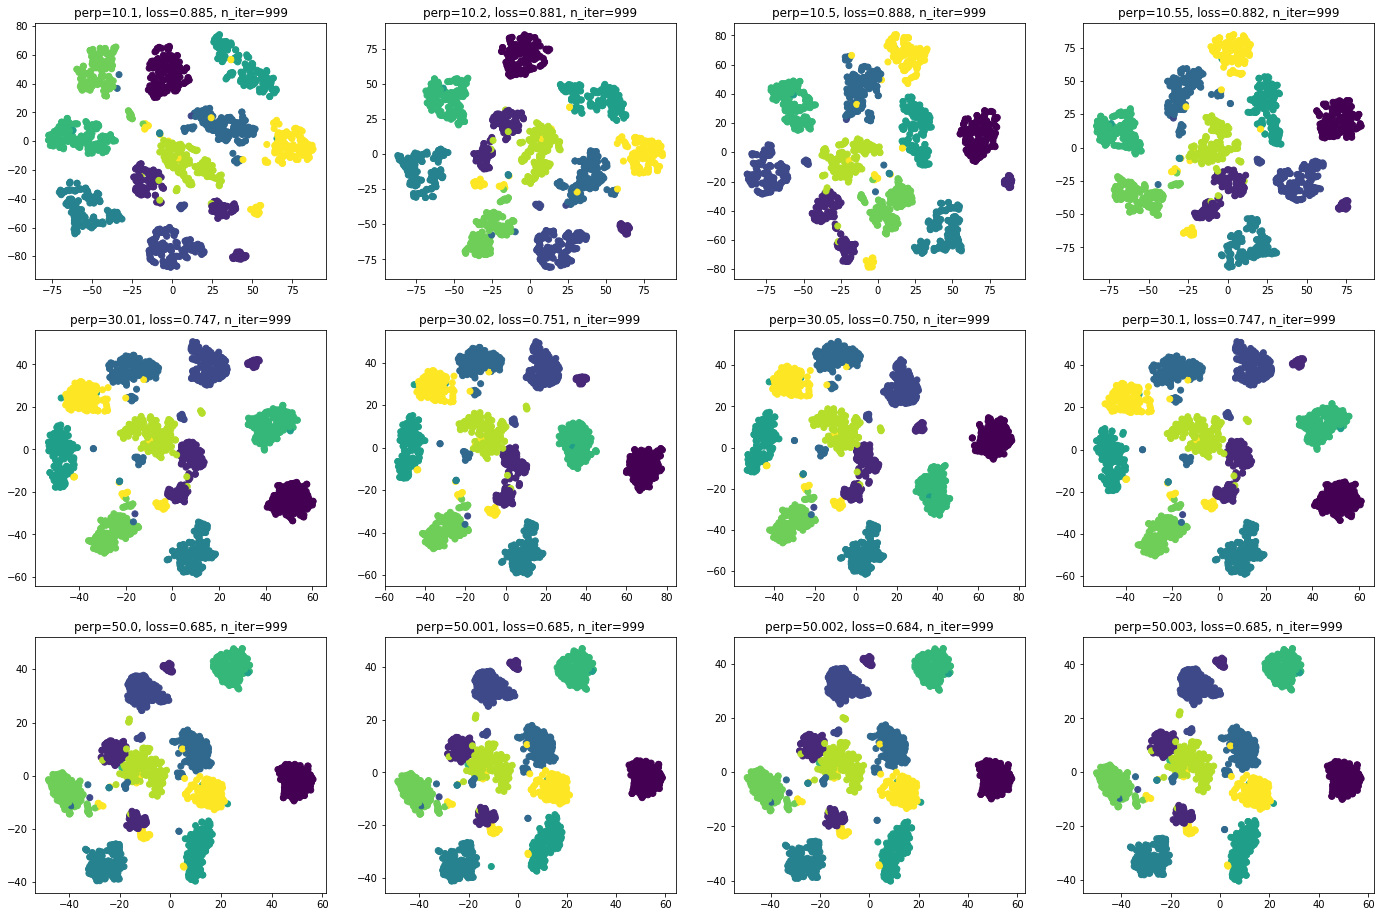

In [26]:
n_rows = len(perp_test_cases)
n_cols = len(perp_test_cases[0])

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_rows*8, n_cols*4))

for r in range(n_rows):
    for c in range(n_cols):
        (X_2d, loss, n_iter) = results[r][c]
        perp = perp_test_cases[r][c]
        title = 'perp={}, loss={:.3f}, n_iter={}'.format(perp, loss, n_iter)
        axes[r][c].scatter(X_2d[:, 0], X_2d[:, 1], c=y)
        axes[r][c].set_title(title)
        
plt.savefig('./plots/different_perp.png')
plt.show()